In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
nlp = spacy.load('en_core_web_lg')


In [14]:
text = 'We created a new dataset which emphasizes diversity of content, by scraping content from the Internet. In order to preserve document quality, we used only pages which have been curated/filtered by humans--specifically, we used outbound links from Reddit which received at least 3 karma. This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl.'

In [16]:
!ls data/

001.txt          102.txt          203.txt          304.txt
002.txt          103.txt          204.txt          305.txt
003.txt          104.txt          205.txt          306.txt
004.txt          105.txt          206.txt          307.txt
005.txt          106.txt          207.txt          308.txt
006.txt          107.txt          208.txt          309.txt
007.txt          108.txt          209.txt          310.txt
008.txt          109.txt          210.txt          311.txt
009.txt          110.txt          211.txt          312.txt
010.txt          111.txt          212.txt          313.txt
011.txt          112.txt          213.txt          314.txt
012.txt          113.txt          214.txt          315.txt
013.txt          114.txt          215.txt          316.txt
014.txt          115.txt          216.txt          317.txt
015.txt          116.txt          217.txt          318.txt
016.txt          117.txt          218.txt          319.txt
017.txt          118.txt          219.txt          320.t

In [15]:
doc = nlp(text)
print([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])

['create', 'new', 'dataset', 'emphasize', 'diversity', 'content', 'scrape', 'content', 'internet', 'order', 'preserve', 'document', 'quality', 'page', 'curate', 'filter', 'human', 'specifically', 'outbound', 'link', 'Reddit', 'receive', '3', 'karma', 'think', 'heuristic', 'indicator', 'user', 'find', 'link', 'interesting', 'educational', 'funny', 'lead', 'high', 'datum', 'quality', 'similar', 'dataset', 'CommonCrawl']


In [35]:
# import os

# def gather_data(filefolder):
#     ''' Produces List of Documents from a Directory
    
#     filefolder (str): a path of .txt files
    
#     returns list of string
#     '''
    
#     data = []
#     print(os.path, filefolder)
#     files = os.listdir(filefolder) # causes variation across machines
    
#     for article in files:
#         path = os.path.join(filefolder, article)
        
#         if path[-3:] == 'txt': # os ~endswith('txt')
#             with open(path, 'rb') as f:
#                 data.append(f.read())
#     return data

In [39]:
from glob import glob

def gather_data_v2(filefolder):
    data = []
    file_list = sorted(glob(filefolder + '/*.txt'))
    for article in file_list:
        with open(article, 'rb') as f:
            data.append(f.read())
    return data

In [40]:
data = gather_data_v2('./data')

In [41]:
len(data)

401

In [42]:
data[0]

b'Ink helps drive democracy in Asia\n\nThe Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviolet readers in the country\'s elections as part of a drive to prevent multiple voting.\n\nThis new technology is causing both worries and guarded optimism among different sectors of the population. In an effort to live up to its reputation in the 1990s as "an island of democracy", the Kyrgyz President, Askar Akaev, pushed through the law requiring the use of ink during the upcoming Parliamentary and Presidential elections. The US government agreed to fund all expenses associated with this decision.\n\nThe Kyrgyz Republic is seen by many experts as backsliding from the high point it reached in the mid-1990s with a hastily pushed through referendum in 2003, reducing the legislative branch to one chamber with 75 deputies. The use of ink is only one part of a general effort to show commitment towards more open elections - the German Embass

In [47]:
# count vectorizer

# list of text documents
text = ['We created a new dataset which emphasizes diversity of content, by scraping content from the Internet.',
        'In order to preserve document quality, we used only pages which have been curated/filtered by humans--specifically, we used outbound links from Reddit which received at least 3 karma.', 
        'This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl.']
# create the transformer
vect = CountVectorizer()
# build vocab
vect.fit(text)
# transform text
dtm = vect.transform(text)

# create a vocabulary
# the vocabulary establishes all of the possible words that we might use.
# the vocabulary dictionary does not represent the counts of words!!

In [53]:
display(type(dtm.todense()))
display(dtm.todense())

numpy.matrix

matrix([[0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
         0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
         1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2],
        [2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
         1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0,
         0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0]])

In [49]:
print(vect.get_feature_names())

['as', 'at', 'be', 'been', 'by', 'can', 'commoncrawl', 'content', 'created', 'curated', 'data', 'dataset', 'datasets', 'diversity', 'document', 'educational', 'emphasizes', 'filtered', 'for', 'found', 'from', 'funny', 'have', 'heuristic', 'higher', 'humans', 'in', 'indicator', 'interesting', 'internet', 'karma', 'leading', 'least', 'link', 'links', 'new', 'of', 'only', 'or', 'order', 'other', 'outbound', 'pages', 'preserve', 'quality', 'received', 'reddit', 'scraping', 'similar', 'specifically', 'such', 'than', 'the', 'this', 'thought', 'to', 'used', 'users', 'we', 'whether', 'which']


/Users/jeffkang/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-oR_Dfgyc/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
text[:25]

['We created a new dataset which emphasizes diversity of content, by scraping content from the Internet.',
 'In order to preserve document quality, we used only pages which have been curated/filtered by humans--specifically, we used outbound links from Reddit which received at least 3 karma.',
 'This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl.']

In [51]:
print(dtm) # sparse matrix, matrices

  (0, 4)	1
  (0, 7)	2
  (0, 8)	1
  (0, 11)	1
  (0, 13)	1
  (0, 16)	1
  (0, 20)	1
  (0, 29)	1
  (0, 35)	1
  (0, 36)	1
  (0, 47)	1
  (0, 52)	1
  (0, 58)	1
  (0, 60)	1
  (1, 1)	1
  (1, 3)	1
  (1, 4)	1
  (1, 9)	1
  (1, 14)	1
  (1, 17)	1
  (1, 20)	1
  (1, 22)	1
  (1, 25)	1
  (1, 26)	1
  (1, 30)	1
  :	:
  (2, 10)	1
  (2, 12)	1
  (2, 15)	1
  (2, 18)	1
  (2, 19)	1
  (2, 21)	1
  (2, 23)	1
  (2, 24)	1
  (2, 27)	1
  (2, 28)	1
  (2, 31)	1
  (2, 33)	1
  (2, 36)	1
  (2, 38)	1
  (2, 40)	2
  (2, 44)	1
  (2, 48)	1
  (2, 50)	1
  (2, 51)	1
  (2, 52)	1
  (2, 53)	1
  (2, 54)	1
  (2, 55)	1
  (2, 57)	1
  (2, 59)	2


In [54]:
display(type(dtm))
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
display(dtm)

scipy.sparse.csr.csr_matrix

/Users/jeffkang/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-oR_Dfgyc/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,as,at,be,been,by,can,commoncrawl,content,created,curated,...,than,the,this,thought,to,used,users,we,whether,which
0,0,0,0,0,1,0,0,2,1,0,...,0,1,0,0,0,0,0,1,0,1
1,0,1,0,1,1,0,0,0,0,1,...,0,0,0,0,1,2,0,2,0,2
2,2,0,1,0,0,1,1,0,0,0,...,1,1,1,1,1,0,1,0,2,0


In [58]:
data[0][:150]

b'Ink helps drive democracy in Asia\n\nThe Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviol'

In [59]:
vect = CountVectorizer(max_features=1000)
vect.fit(data)
dtm = vect.transform(data)
dtm = pd.DataFrame(dtm.todense(),columns=vect.get_feature_names())

/Users/jeffkang/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-oR_Dfgyc/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [60]:
dtm.head()

,000,10,100,11,12,14,15,18,20,200,...,writing,xbox,xp,yahoo,year,years,yet,york,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,2,0,0,0,0,0,1,2,...,0,0,0,0,2,3,0,0,2,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,2,1,0,0,0,0


In [61]:
doc_len = [len(doc) for doc in data]

/Users/jeffkang/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-oR_Dfgyc/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


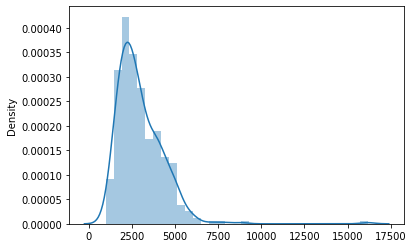

In [62]:
import seaborn as sns
sns.distplot(doc_len);

In [63]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
dtm = tfidf.fit_transform(data)
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())
dtm.head()

/Users/jeffkang/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-oR_Dfgyc/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,10,100,101,104,10m,11,12,120,13,...,yoda,yoran,york,young,younger,youngsters,youth,zafi,zen,zombies
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.021186,0.0,0.030607,0.0,0.0,0.0,0.0,0.062425,0.0,0.0,...,0.0,0.0,0.0,0.085659,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.083089,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.026840,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [67]:
tfidf = TfidfVectorizer(stop_words='english',
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)
dtm = tfidf.fit_transform(data)
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())
dtm.head()

/Users/jeffkang/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-oR_Dfgyc/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['nt'] not in stop_words.
  warnings.warn(
/Users/jeffkang/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-oR_Dfgyc/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,15,2004,22,50,ability,accord,add,airline,announce,...,£ 11.5,£ 132,"£ 2,000",£ 20,£ 339,£ 4.99,£ 40,£ 5,£ 50,£ 99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.034733,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
dtm.shape

(401, 8234)

In [69]:
dist_matrix = cosine_similarity(dtm)

In [70]:
df = pd.DataFrame(dist_matrix)

In [73]:
display(df.shape)
display(df.head())

(401, 401)

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,1.000000,0.024262,0.009818,0.016531,0.019463,0.035255,0.005015,0.010819,0.018646,0.013423,...,0.006314,0.011297,0.011503,0.021066,0.015122,0.006871,0.011378,0.032704,0.013616,0.035136
1,0.024262,1.000000,0.015814,0.056103,0.028265,0.068635,0.015282,0.025611,0.025558,0.029017,...,0.064489,0.037018,0.032574,0.035007,0.028980,0.040772,0.043008,0.035147,0.034915,0.068568
2,0.009818,0.015814,1.000000,0.015810,0.021603,0.029559,0.230110,0.224922,0.015153,0.072542,...,0.020925,0.031420,0.067577,0.043039,0.031779,0.048366,0.161999,0.050837,0.075845,0.024297
3,0.016531,0.056103,0.015810,1.000000,0.050373,0.065334,0.017884,0.014069,0.167900,0.039815,...,0.029717,0.018186,0.064041,0.079373,0.091745,0.026381,0.016614,0.042346,0.037794,0.065001
4,0.019463,0.028265,0.021603,0.050373,1.000000,0.063013,0.013527,0.021948,0.054264,0.050800,...,0.090229,0.083483,0.106182,0.143000,0.231250,0.087713,0.031691,0.070180,0.027745,0.127698


In [74]:
data[0][:100]

b'Ink helps drive democracy in Asia\n\nThe Kyrgyz Republic, a small, mountainous state of the former Sov'

In [75]:
df[0][:5]

0    1.000000
1    0.024262
2    0.009818
3    0.016531
4    0.019463
Name: 0, dtype: float64

In [76]:
df[df[0] < 1][0].sort_values(ascending=False)[:5] 

332    0.252165
36     0.207818
242    0.103224
100    0.100952
208    0.098790
Name: 0, dtype: float64

In [79]:
print(data[0][:150])
print(data[332][:150])

b'Ink helps drive democracy in Asia\n\nThe Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviol'
b'US woman sues over ink cartridges\n\nA US woman is suing Hewlett Packard (HP), saying its printer ink cartridges are secretly programmed to expire on a '


In [80]:
dtm.head()

,10,15,2004,22,50,ability,accord,add,airline,announce,...,£ 11.5,£ 132,"£ 2,000",£ 20,£ 339,£ 4.99,£ 40,£ 5,£ 50,£ 99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.034733,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree')

In [82]:
nn.kneighbors([dtm.iloc[1].values])

/Users/jeffkang/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-oR_Dfgyc/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


(array([[0.        , 1.06320049, 1.19821186, 1.30385441, 1.33649651]]),
 array([[  1,  73, 185, 383, 365]]))

In [83]:
nn.kneighbors([dtm.iloc[185].values])

/Users/jeffkang/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-oR_Dfgyc/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


(array([[0.        , 1.12058056, 1.19821186, 1.19918717, 1.20156818]]),
 array([[185,  73,   1,  75, 383]]))

In [84]:
display(data[185][:200])
display(data[73][:200])

b"China 'blocks Google news site'\n\nChina has been accused of blocking access to Google News by the media watchdog, Reporters Without Borders.\n\nThe Paris-based pressure group said the English-language ne"

b"China 'to overtake US net use'\n\nThe Chinese net-using population looks set to exceed that of the US in less than three years, says a report.\n\nChina's net users number 100m but this represents less tha"

In [86]:
nlp = spacy.load('en_core_web_lg')
doc = nlp('Two bananas in pyjamas')
bananas_vector = doc.vector
print(bananas_vector)

[ 2.07984239e-01 -2.60890484e-01 -1.15457252e-01 -1.96443751e-01
 -2.83249468e-03  3.55849974e-02 -2.05170006e-01 -2.27374747e-01
  8.56052488e-02  1.36894751e+00 -5.74124977e-02  8.06210041e-02
  2.37275064e-02  1.17454052e-01 -6.53099641e-03 -1.24400005e-01
  1.99086756e-01  6.37722552e-01  1.52916998e-01 -2.33504996e-01
 -2.40909994e-01 -7.11500049e-02 -9.10753161e-02  7.16734976e-02
  1.16262749e-01 -3.91372502e-01  1.13048747e-01 -2.11327493e-01
  1.09019078e-01 -2.44885415e-01  3.00577488e-02  4.77855802e-02
  7.37800002e-02  2.57142037e-01  2.62586236e-01 -1.66897491e-01
  1.87596500e-01 -1.23680010e-02 -1.76299751e-01  1.11685000e-01
  1.82024967e-02  9.86500084e-03 -3.58770013e-01 -2.23265499e-01
 -4.37720008e-02  3.63999486e-01  7.42954984e-02  1.21225506e-01
  1.37013003e-01 -5.50666526e-02  2.66017504e-02  8.87180045e-02
 -1.14092499e-01 -2.02865750e-01  3.63092512e-01 -3.08394760e-01
  1.13859497e-01  3.13650146e-02  2.62076259e-01  1.90399922e-02
  7.24634901e-02  2.79004

In [87]:
len(bananas_vector)

300

In [89]:
doc1 = nlp("I do not like dogs")
doc2 = nlp("I like dogs.")

similarity = doc1.similarity(doc2)
print(similarity)

0.9237858156416685


In [95]:
def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

words = ['car', 'truck', 'suv', 'race', 'elves', 'dragon', 'sword', 'king', 'queen', 'prince', 'horse', 'fish', 'lion', 'tiger', 'lynx', 'fish', 'potato']
# initialize pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best
# way to project the data down that will best maintain the relative distances
# between data points. It will store these instuctions on how to transform
pca.fit(get_word_vectors(words))

# tell our (fitted) pca model to transform our 300D data down onto 2D using the
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(words))

# look at our new 2d word vectors
word_vecs_2d

array([[ 5.26963187, -0.37100442],
       [ 4.72929344,  0.1794414 ],
       [ 4.47598865, -1.64013699],
       [ 2.39999411, -0.33939468],
       [-1.39927039, -2.06257828],
       [-2.09150026, -0.68151188],
       [-2.18801592, -1.67088976],
       [-2.1066147 , -2.45387448],
       [-1.62177188, -2.33377177],
       [-1.80384573, -2.64626656],
       [ 0.70518192,  0.02432584],
       [-1.1161889 ,  5.24981021],
       [-1.83469309, -0.26792143],
       [-1.53253594,  0.86803528],
       [-0.84059849,  0.10719955],
       [-1.1161889 ,  5.24981021],
       [ 0.07113423,  2.78872774]])

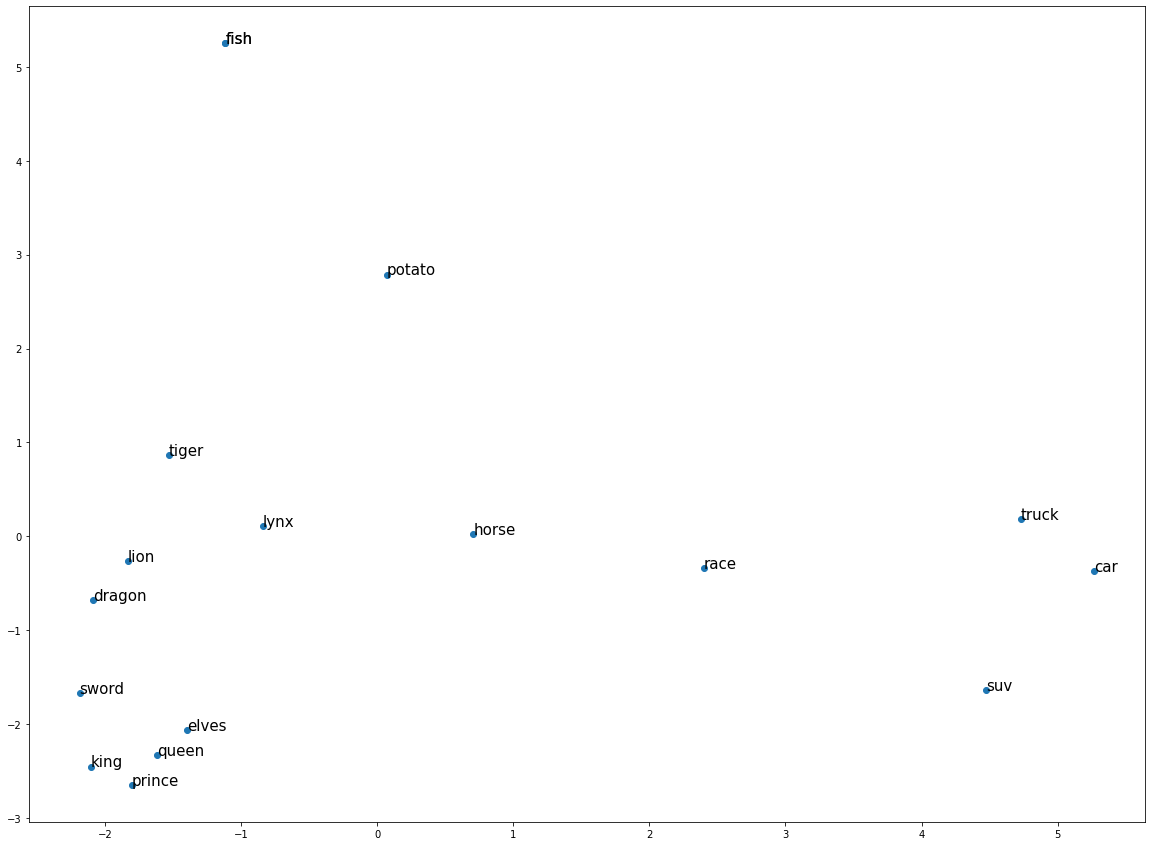

In [96]:
plt.figure(figsize=(20,15))

plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size=15)
plt.show()

In [98]:
X = [nlp(str(d)).vector for d in data]
df = pd.DataFrame(X)

In [99]:
display(df.shape)
display(df.head())

(401, 300)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.040508,0.118313,-0.059275,-0.018551,0.028807,-0.012388,-0.045898,-0.001236,-0.010094,2.107986,...,-0.226307,0.048829,0.066400,-0.085754,-0.051722,0.006362,0.002462,-0.057015,-0.007771,0.088315
1,-0.001170,0.094481,-0.090321,-0.056536,0.075293,-0.035214,0.001944,-0.045513,0.052784,2.203317,...,-0.225346,0.014044,0.065145,-0.002483,-0.030395,-0.006571,0.005746,-0.084917,0.037098,0.140163
2,-0.115597,0.141120,-0.099435,-0.034110,-0.020472,0.002247,0.023609,-0.239514,0.024079,1.922905,...,-0.177707,0.083151,0.071212,0.090530,0.072955,-0.065791,-0.026913,-0.052953,-0.019003,0.110700
3,-0.057802,0.177254,-0.059729,-0.047598,0.086353,-0.060286,-0.021713,-0.130302,0.009562,2.144755,...,-0.233238,0.006141,0.065824,-0.002070,-0.013150,-0.011400,-0.025868,-0.067189,-0.011133,0.071841
4,-0.022019,0.154302,-0.065393,-0.104091,0.094629,-0.004325,0.001518,-0.030950,-0.028366,2.113439,...,-0.276260,0.010026,0.032849,-0.005290,-0.052966,-0.031755,-0.029510,-0.034102,-0.024186,0.131415
